# Análise de dados dos cursos do UDEMY por número de inscritos
#### Essa análise usa dados coletados no Kaggle de cursos do Udemy. O foco é realizar uma análise por cursos que obtiveram mais inscritos, não rendimento do curso. Seria possível realizar o rendimento multiplicando o custo pelo número de inscritos (ambas informações disponíveis), mas foram realizadas promoções e descontos que podem não ter sido durante todo o período de disponibilidade do curso, o que afetaria o ganho total por curso. Ao invés disso, custo e promoção serão utilizadas como variáveis independentes.

In [1]:
#Importando bibliotecas usadas inicialmente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importando base de dados e visualizando 
data = pd.read_csv('../input/business-courses-udemy-10k-courses/udemy_output_All_Business_p1_p626.csv')
data.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [3]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [5]:
data.query('num_published_lectures == 0')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
609,1766420,PMP PMBOK 6 Practice Exams: Set One for PMP Ca...,/course/pmp_practice_exams_1/,True,6208,4.33465,4.28676,4.28676,782,False,0,5,2018-06-25T15:14:26Z,2018-07-16T18:33:14Z,488.0,INR,₹488,6400.0,INR,"₹6,400"
681,1591290,Agile Project Management Bootcamp: Agile Proje...,/course/agile-project-management-course/,True,5260,4.24667,4.20066,4.20066,682,False,0,2,2018-03-11T13:11:54Z,2018-03-12T06:52:39Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
709,1621470,"PMP Certification Exam Prep PMBOK 6th Edition,...",/course/pmp-practice-exams-pmbok-guide-6th-edi...,True,4224,4.28804,4.30258,4.30258,650,False,0,3,2018-03-29T12:05:18Z,2018-04-26T06:28:34Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
716,1491820,PRINCE2 Foundation Practice Certification Exam...,/course/prince2-foundation-practice-certificat...,True,6450,4.45181,4.38882,4.38882,640,False,0,6,2018-01-03T02:06:24Z,2018-03-10T20:27:03Z,462.0,INR,₹462,6400.0,INR,"₹6,400"
839,1636714,PMI-ACP Practice Exams - PMBOK 6,/course/pmi-acp-practice-exams-pmbok-6/,True,5731,4.18000,4.17322,4.17322,528,False,0,2,2018-04-08T15:50:04Z,2018-04-08T16:30:01Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,2175872,PMP - Project Management Professional pract...,/course/pmp-project-management-professional-pr...,True,30,4.00000,3.66165,3.66165,3,False,0,4,2019-01-25T14:52:25Z,2019-01-30T17:49:59Z,455.0,INR,₹455,2880.0,INR,"₹2,880"
9328,2842422,CIPS Advanced Diploma: Managing Contractual Ri...,/course/cips-l5m3-managing-contractual-risk/,True,15,3.66667,3.72142,3.72142,3,False,0,2,2020-02-29T00:56:29Z,2020-02-29T13:23:47Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9379,2781478,SCOPE AND INFLUENCE OF PROCUREMENT AND SUPPLY-...,/course/scope-and-influence-of-procurement-and...,True,30,3.66667,3.66316,3.66316,3,False,0,4,2020-01-27T10:22:10Z,2020-01-30T12:56:33Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9401,2427030,Change Management Foundation based on ECMHBook,/course/change-management-foundation-based-on-...,True,96,3.33333,2.87283,2.87283,3,False,0,2,2019-06-24T04:35:06Z,2019-12-13T20:35:01Z,455.0,INR,₹455,2560.0,INR,"₹2,560"


#### É possível perceber que existem cursos sem aulas publicadas, esses não são cursos, mas exames práticos que itilizam testes publicados, como essa análise é de cursos, somente serão considerados cursos com aulas publicadas.

In [6]:
data = data.query('num_published_lectures > 0')
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.263000e+03,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,8757.000000,9263.000000
mean,1.440125e+06,3447.991040,4.143260,4.130015,4.130015,303.977221,35.084206,0.031955,487.275437,4868.850264
std,8.939289e+05,10544.441345,0.451043,0.474871,0.474871,1844.509839,46.257922,0.215603,240.558922,3111.880545
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,455.000000,1280.000000
25%,6.611100e+05,150.000000,3.900000,3.882860,3.882860,12.000000,14.000000,0.000000,455.000000,1600.000000
50%,1.354030e+06,952.000000,4.208330,4.210420,4.210420,33.000000,23.000000,0.000000,455.000000,4160.000000
75%,2.121547e+06,2931.000000,4.450000,4.450945,4.450945,112.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,2.000000,3200.000000,12800.000000


#### O máximo de número de aulas publicadas é bem destoante dos quartis, pode se tratar de um outlier ou de uma distribuição com uma calda muito grande. Vamos verificar

In [7]:
#Dando alguns ajuses te cor e estilo ao seaborn.
sns.set_palette('PRGn')
sns.set_style('ticks')

In [8]:
data['num_published_lectures'].isna().sum()

0

In [9]:
np.isinf(data['num_published_lectures']).sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de aulas publicadas'}, xlabel='Aulas publicadas', ylabel='Frequencia'>

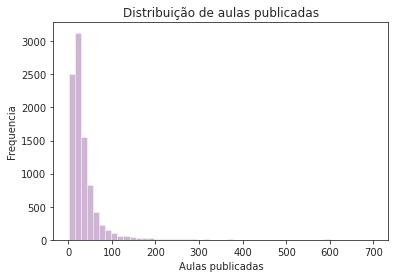

In [10]:
ax = sns.distplot(data['num_published_lectures'], kde=False, norm_hist=False)
ax.set_title('Distribuição de aulas publicadas')
ax.set(xlabel='Aulas publicadas', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Aulas publicadas'}, xlabel='num_published_lectures'>

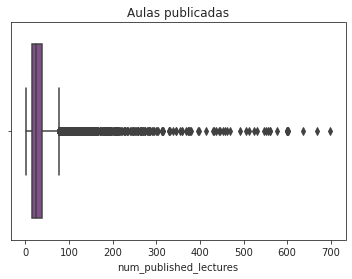

In [11]:
ax = sns.boxplot(data['num_published_lectures'])
ax.set_title('Aulas publicadas')
ax

In [12]:
data.query('num_published_lectures > 500')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
42,1802404,The Complete Communication Skills Master Class...,/course/the-complete-communication-skills-mast...,True,62384,4.35213,4.33177,4.33177,9196,False,600,0,2018-07-16T19:50:59Z,2018-07-21T15:50:46Z,546.0,INR,₹546,10240.0,INR,"₹10,240"
67,1659676,The Complete Digital Marketing Guide - 18 Cour...,/course/digital-marketing-guide/,True,25820,4.50586,4.46247,4.46247,5763,False,637,0,2018-04-23T17:07:41Z,2018-05-04T19:32:32Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
204,1854668,The Complete Storytelling Course for Speaking ...,/course/the-complete-storytelling-course-for-s...,True,26148,4.37712,4.32759,4.32759,2340,False,600,0,2018-08-13T20:46:53Z,2018-08-16T18:34:39Z,488.0,INR,₹488,9280.0,INR,"₹9,280"
256,1551970,Communication Skills for Beginners,/course/communication-skills-for-beginners-d/,True,48057,4.36978,4.31345,4.31345,1988,False,601,0,2018-02-12T22:39:27Z,2018-02-15T11:12:49Z,514.0,INR,₹514,9600.0,INR,"₹9,600"
409,375594,Financial Management A Complete Study for CA/C...,/course/financial-management-a-complete-study/,True,10673,4.34375,4.33252,4.33252,1185,False,561,0,2014-12-22T13:49:03Z,2014-12-22T16:57:30Z,481.0,INR,₹481,8960.0,INR,"₹8,960"
424,1495884,Six Sigma Green Belt Masterclass (includes a G...,/course/six-sigma-green-belt-training-certific...,True,5921,4.60831,4.61972,4.61972,1144,False,505,0,2018-01-05T13:19:52Z,2018-08-20T15:32:40Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
490,1574798,Accounting–Financial Accounting Total-Beginner...,/course/financial-accounting-accounting-cycle/,True,61905,4.39799,4.43079,4.43079,962,False,699,0,2018-02-28T18:05:48Z,2018-03-05T19:35:01Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
499,543242,Learn to Trade The News,/course/learn-to-trade-the-news/,True,5080,4.50000,4.52016,4.52016,935,False,560,0,2015-07-02T15:41:31Z,2015-07-16T22:03:29Z,NaN,NaN,NaN,12800.0,INR,"₹12,800"
539,1412662,"QuickBooks Pro Desktop 2020, 2019, & 2018 Star...",/course/quickbooks-pro-2018-start-to-finish/,True,23483,4.27041,4.18543,4.18543,863,False,668,0,2017-10-28T16:46:07Z,2017-11-11T23:41:38Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
545,1564762,"Winning Communication Skills for Telephone, Co...",/course/telephone-conference-calls-workplace-c...,True,39262,4.41667,4.45210,4.45210,857,False,601,0,2018-02-21T16:14:29Z,2018-02-22T01:54:10Z,514.0,INR,₹514,9600.0,INR,"₹9,600"


#### Os cursos muito longos são agregados de uma série de cursos de uma mesma área. Representam opções válidas dentro do escopo de vendas do Udemy.Os outros dados não parecem ruins, os dados de testes práticos são praticamente nulos, mas isso também é aceitável. 

#### Agora, vamos explorar o número de inscritos, que é a variável dependente, para saber a qualidade dos dados.

In [13]:
#Dando alguns ajuses te cor e estilo ao seaborn.
sns.set_palette('PRGn')
sns.set_style('ticks')

In [14]:
data['num_subscribers'].isna().sum()

0

In [15]:
np.isinf(data['num_subscribers']).sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

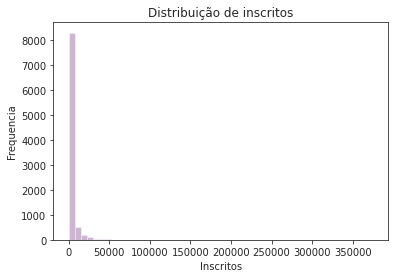

In [16]:
ax = sns.distplot(data['num_subscribers'], kde=False, norm_hist=False)
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

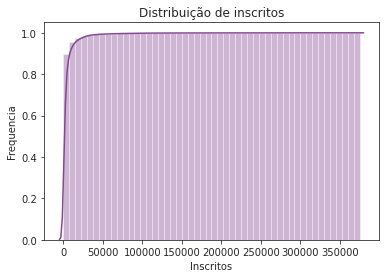

In [17]:
#Para confirmar que existe uma distribuição quase toda em valores muito baixos, 
#estou colocando de forma cumulativa, utilizando códigos do matplotlib. 
ax = sns.distplot(data['num_subscribers'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Inscritos'}, xlabel='num_subscribers'>

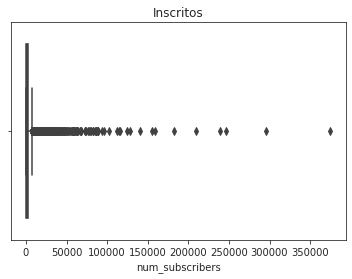

In [18]:
ax = sns.boxplot(data['num_subscribers'])
ax.set_title('Inscritos')
ax

#### Avaliando o número de inscritos, fica evidente que existe um descompasso nos cursos. Alguns com quantidades imensas de inscritos e outros com quantidades significativamente menores. Há dois cursos de ação possíveis. Por um lado, pode-se assumir que há um grupo de cursos incrivelmente mais bem sucedidos, cujos resultados deve ser, de fato, analisado. Por outro lado, é possível tentar dividir os cursos em categorias que façam sentido em análises separadas, considerando que alguns cursos serão mais segmentados por natureza. 

#### Para esse estudo, como o propósito não é analisar quão bem sucedido certo curso é em certo segmento, escolheu-se trabalhar com os cursos de forma não segmentada. Buscando compreender quais categorias levam mais alunos e inscrições para o Udemy como um todo. 

#### Segue-se, portanto, com a visualização de outras variáveis relevantes na amostra.

In [19]:
data['avg_rating'].isna().sum()

0

In [20]:
np.isinf(data['avg_rating']).sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia da nota média'}, xlabel='Nota média', ylabel='Frequencia'>

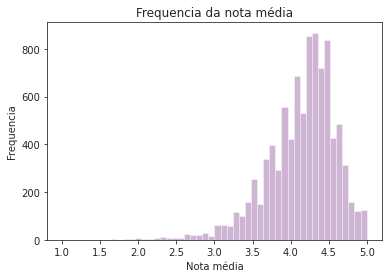

In [21]:
ax = sns.distplot(data['avg_rating'], kde=False, norm_hist=False)
ax.set_title('Frequencia da nota média')
ax.set(xlabel='Nota média', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='avg_rating'>

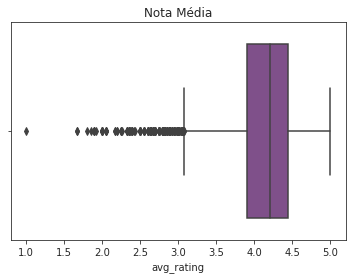

In [22]:
ax = sns.boxplot(data['avg_rating'])
ax.set_title('Nota Média')
ax

#### A nota média tem uma distribuição que tende para a direita, como é esperado do comportamento de avaliação de serviços, em que as pessoas tendem a dar notas mais altas. Há uma nota que parece ser 1 que merece ser investigada.

In [23]:
data.query('avg_rating == 1')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
9374,2188386,Excel based Solar Plant Financial Modelling Co...,/course/online-solar-financial-modelling-course/,True,11,1.0,1.0,1.0,3,False,20,0,2019-01-31T09:32:14Z,2019-05-02T02:12:22Z,1200.0,INR,"₹1,200",4800.0,INR,"₹4,800"


#### O curso teve poucos inscritos, poucos avaliadores e uma nota baixa, o que é aceitável com somente 3 avaliadores. 

#### Como tratado anteriormente, cursos com poucos inscritos parecem fazer parte de cursos muito segmentados, sendo esse um extremo. Não parece ser o caso de um dado mal inscrito, mas de um curso péssimamente avaliado e com poucos alunos. Para a análise, é válido seguir com ele, pois ele representa um caso de falha que deve ser avaliado.

#### retirando valores com na, pois eles não poderão ser avaliados.

In [24]:
data['discount_price__amount'].isna().sum()

506

In [25]:
np.isinf(data['discount_price__amount']).sum()

0

#### O mínimo do desconto não é zero, portanto os NA são, certamente, a ausência de desconto.
#### Dessa forma, é válido transoformar o NA em 0 para seguir o estudo. 

In [26]:
data['discount_price__amount'] = data['discount_price__amount'].fillna(0)
data['discount_price__amount'].isna().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de desconto do curso'}, xlabel='Desconto', ylabel='Frequencia'>

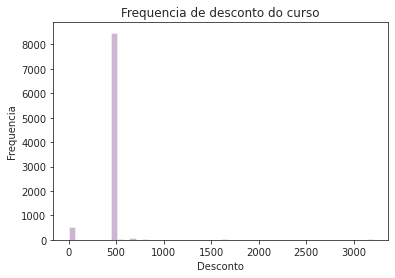

In [27]:
ax = sns.distplot(data['discount_price__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia de desconto do curso')
ax.set(xlabel='Desconto', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='discount_price__amount'>

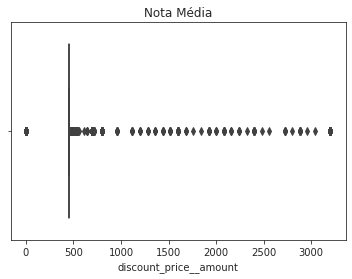

In [28]:
ax = sns.boxplot(data['discount_price__amount'])
ax.set_title('Nota Média')
ax

In [29]:
data['price_detail__amount'].isna().sum()

0

In [30]:
np.isinf(data['price_detail__amount']).sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia do custo do curso'}, xlabel='Custo', ylabel='Frequencia'>

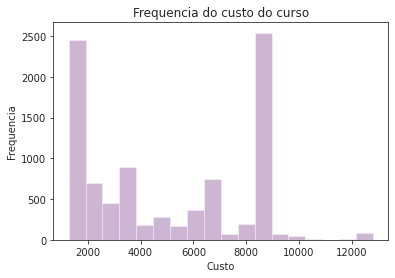

In [31]:
ax = sns.distplot(data['price_detail__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia do custo do curso')
ax.set(xlabel='Custo', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Custo'}, xlabel='price_detail__amount'>

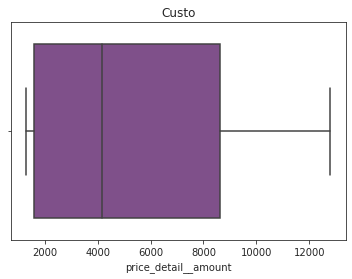

In [32]:
ax = sns.boxplot(data['price_detail__amount'])
ax.set_title('Custo')
ax

In [33]:
data['num_reviews'].isna().sum()

0

In [34]:
np.isinf(data['num_reviews']).sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de avaliações do curso'}, xlabel='Avaliações', ylabel='Frequencia'>

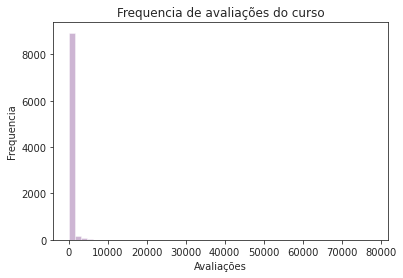

In [35]:
ax = sns.distplot(data['num_reviews'], kde=False, norm_hist=False)
ax.set_title('Frequencia de avaliações do curso')
ax.set(xlabel='Avaliações', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Número de avaliações'}, xlabel='num_reviews'>

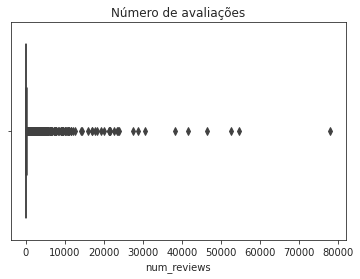

In [36]:
ax = sns.boxplot(data['num_reviews'])
ax.set_title('Número de avaliações')
ax

#### A transgformação logarítmica será necessária para normalizar a distribuição das amostras.

In [37]:
data['log_inscritos'] = np.log(data['num_subscribers'])
data['log_avaliacao_media'] = np.log(data['avg_rating'])
data['log_desconto'] = np.log(data['discount_price__amount']+1)
data['log_valor'] = np.log(data['price_detail__amount'])
data['log_aulas_publicadas'] = np.log(data['num_published_lectures'])
data['log_n_avaliacoes'] = np.log(data['num_reviews'])


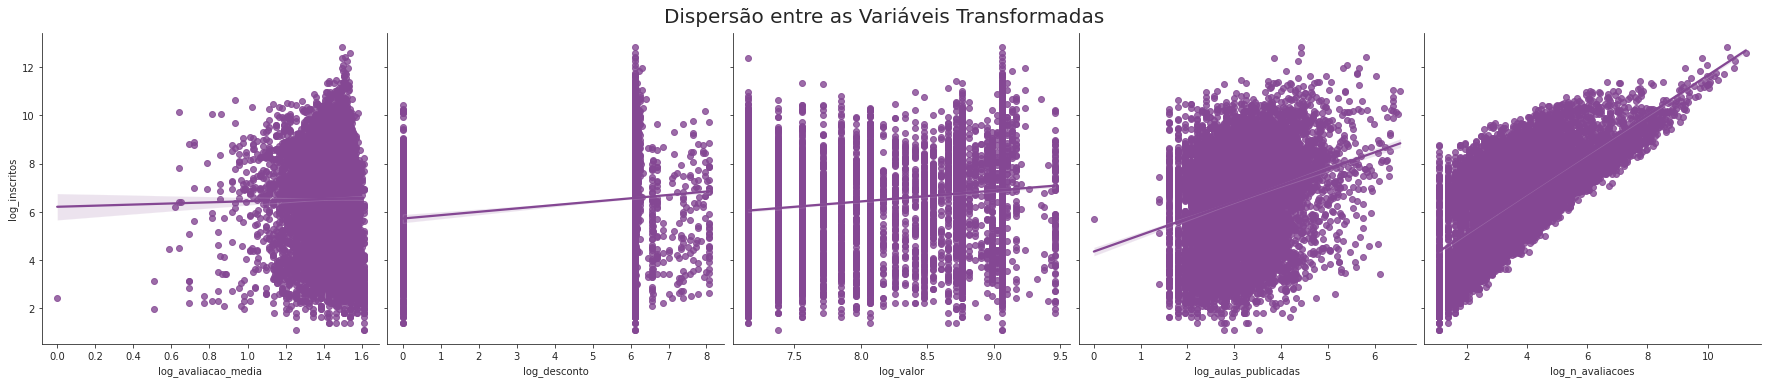

In [38]:
ax = sns.pairplot(data, y_vars='log_inscritos', x_vars=['log_avaliacao_media','log_desconto','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#### Avaliação média segue com muito peso em um dos lados e não apresenta boa distribuição.
#### Número de avaliações parece ser a variável mais eficiente. 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y = data['log_inscritos']
X = data[['log_avaliacao_media','log_desconto','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
#A constante vai ser adicionada para aplicar OLS
import statsmodels.api as sm
X_train_com_constante = sm.add_constant(X_train)

In [43]:
modelo_stats_models = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [44]:
print(modelo_stats_models.summary())

                            OLS Regression Results                            
Dep. Variable:          log_inscritos   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1501.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:02:02   Log-Likelihood:                -13079.
No. Observations:                7410   AIC:                         2.617e+04
Df Residuals:                    7404   BIC:                         2.621e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8438 

#### O modelo saiu com uma probabilidade F abaixo de 0.00, o que indica significância, o Rquadrado de 0.5 é aceitável, porém baixo. Pela análise t, o valor não parece exibir efeito significativo, mas a média de avaliações, valor, aulas publicadas e número de avialiações sim. Sendo uma correlação negativa com avaliação média e positiva com os outros. O maior efeito foi em número de avaliações.

#### O modelo revela que um maior número de avaliações está fortemente correlacionado com o número de inscritos em um curso, o que é evidente emente imaginável desde o início. Entretanto, como resultados interessantes são:
#### Cursos com mais aulas potencialmente atraem mais alunos.
#### Descontos maiores têm efeitos mais importantes que o valor do curso.
#### A correlação positiva do valor do curso e número de inscritos indica que cursos mais caros são mais procurados, entretanto isso pode simplesmente indicar que houve uma avaliação prévia do Udemy e cursos mais procurados são mais caros. 